In [1]:
import pyramses
import cmath
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset, zoomed_inset_axes)
from matplotlib import rc
import pandas as pd
import datetime
import seaborn as sns
import json, codecs
import os
from plot_strong_weak import plot_strong_weak
from save_figure import save_figure

# from importnb import Notebook
# with Notebook(): 
#     from CIGRE18_multisim import VAR
# print(VAR)

# Set plot options
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
cm = 1/2.54
pt = 1/72.27
sns.set_context("paper", font_scale = 0.7, rc={"grid.linewidth": 0.6})
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)
# colors_ blue, red, yellow, green. purple gray light blue dark blue dark green
palette1 = ["#1269b0","#a8322d",'#edb120','#72791c', "#91056a", '#6f6f64', '#007a96', '#1f407a','#485a2c']
# palette = ["#1269b0","#a8322d", "#91056a", '#edb120','#72791c', '#6f6f64', '#007a96', '#1f407a','#485a2c']
sns.set_palette(palette1)
# sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

In [2]:
# Current date

today = datetime.date.today()
# date = today
date = '2022-04-06'

directory = ".\\" +  str(date) + "\\"
# KP_P = np.linspace(0,2,11)
# Tp2 = [0, 1]
# Loop over the different loads
atls = ['TL1', 'TL11', 'TL15', 'TL16', 'TL17', 'TL18'] 
# Loop over the different files
names_weak = ['weak_on', 'weak_off', 'weak_droop']
names_strong = ['strong_on', 'strong_off', 'strong_droop']
# types = ['on', 'off', 'droop']
# types = ['active', 'inactive', 'droop']
# names = ['weak', 'strong']
# names = names_weak
# fig_name = 'strong-weak comparison'
# # names_hyst = []

# # VAR = KP_P
# # replace_str = "KP_P"
# var_path = ".\\" + str(today) + "\\var.json"
# obj_text = codecs.open(var_path, 'r', encoding='utf-8').read()
# VAR = json.loads(obj_text)
# var_str = list(VAR.keys())[0]

# out_dir = ".\\" + str(today) + "\\" + var_str + "\\"
# # Get the parameters
# with open(out_dir + 'parameters.json', 'r') as openfile:
#     parameters = json.load(openfile)
    

# fig_title = var_str + ' variation'
# fig_name = var_str + ' variation'
# for parameter in parameters:
#     fig_title += "; " + parameter + "= " + str(parameters[parameter])
#     fig_name += " " + parameter + str(parameters[parameter])
# # print(title)

# for i,var in enumerate(VAR[var_str]):
#     names.append('out_' + var_str + str(i))
#     # names_hyst.append('out_hyst' + str(i))

In [3]:
# ext = {}
types = ['active', 'inactive', 'droop']
names = ['weak', 'strong']
variables = ['time [s]', '$p_\mathrm{ATL}$ [MW]']
fig_name = 'droop comparison'
events_left = {
    '$^1$': 2,
    '$^2$':2.5,
    '$^3$': 3.65,
    '$^4$': 5.1
}
events_right = {
    '$^5$': 2,
    '$^6$':2.5,
}
# events_left = {
#     'Power drop': 2,
#     '$LoE = 1$':2.5,
#     '2 units shut down (centralized control)': 3.65,
#     '2 units shut down (droop control)': 5.1
# }
# events_right = {
#     'Power drop': 2,
#     '$LoE = 1$':2.5,
# }

parameters_left = '\n'.join(('$H = 1.5$ s',
                             '$\Delta P = 1.5$ MW',
                             # "ATLs' load share = 20\%"
                            ))
parameters_right = '\n'.join(('$H = 6$ s',
                              '$\Delta P = 1.5$ MW',
                              # "ATLs' load share = 20\%"
                             ))

In [4]:
fig_name = 'sum of exponential loads comparison'
MVbuses = [i for i in range(1101,1176)]
LVbuses = [i for i in range(1,19)]
LVbuses_loads = [1,11,15,16,17,18]
LVbuses_PV = [11,15,16,17,18]
buses = []
loads = []
PVs = []
TLs = []
IMs = []
for MVbus in MVbuses:
    for LVbus in LVbuses:
        buses.append(str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        loads.append("IMP" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_PV:
        PVs.append("PV" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        TLs.append("ATL" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        IMs.append("IND" + str(MVbus) + str(LVbus).zfill(2))
# P_active = 0
# P_unactive = 0
# P_droop = 0

# ext=pyramses.extractor(directory + "weak_active.trj")

# for IMP in TLs:
#     P_active += ext.getInj(IMP).P.value
# ext=pyramses.extractor(directory + "weak_inactive.trj")
# for IMP in TLs:
#     P_unactive += ext.getInj(IMP).P.value
# ext=pyramses.extractor(directory + "weak_droop.trj")
# for IMP in TLs:
#     P_droop += ext.getInj(IMP).P.value

In [5]:
A = []
B = []
C = variables*6
D = []
for name in names:
    for var in variables:
        for typ in types:
            A += [name]
for name in names:
    for typ in types:
        for var in variables:
            B += [typ]

for name in names:
    for typ in types:
        P = 0
        # ext1 = pyramses.extractor(directory + name + '_' + typ + ".trj")
        ext = pyramses.extractor(directory + name + '_' + typ + ".trj")
        D.append(ext.getSync('G').S.time)
        for IMP in TLs:
            P += ext.getInj(IMP).P.value
        D.append(P)
        # D.append(ext.getBus('114115').mag.value)

df = pd.DataFrame(zip(A, B, C, D), columns=['name','type', 'value','data'])
df.set_index(['name', 'type', 'value'], inplace=True)
df

data
name   type     value                                                                   
weak   active   time [s]               [0.0, 0.001, 0.001, 0.002, 0.012, 0.022, 0.032...
                $p_\mathrm{ATL}$ [MW]  [-1.7739400000000003, -1.77394, -1.77394, -1.7...
       inactive time [s]               [0.0, 0.001, 0.001, 0.002, 0.012, 0.022, 0.032...
                $p_\mathrm{ATL}$ [MW]  [-1.7739400000000003, -1.77394, -1.77394, -1.7...
       droop    time [s]               [0.0, 0.001, 0.001, 0.002, 0.012, 0.022, 0.032...
                $p_\mathrm{ATL}$ [MW]  [-1.7739400000000003, -1.7739399999999979, -1....
strong active   time [s]               [0.0, 0.001, 0.001, 0.002, 0.012, 0.022, 0.032...
                $p_\mathrm{ATL}$ [MW]  [-1.7739400000000005, -1.7739400000000012, -1....
       inactive time [s]               [0.0, 0.001, 0.001, 0.002, 0.012, 0.022, 0.032...
                $p_\mathrm{ATL}$ [MW]  [-1.7739400000000005, -1.7739400000000012, -1....
       droop    time [s]               [0.0, 0.001, 0.001, 0.002, 0.012, 0.022, 0.032...
                $p_\mathrm{ATL}$ [MW]  [-1.7739400000000005, -1.7739400000000005, -1....

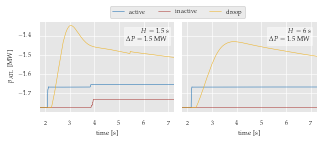

In [6]:
# fig,axs = plt.subplots(2,len(names), figsize = (360*pt,4*72*pt), sharex='col', sharey = 'row')
fig,axs = plt.subplots(1,len(names), figsize = (360*pt,120*pt), sharex='col', sharey = 'row')

# fig.suptitle("\detokenize{"+ fig_title +"}")
fig.subplots_adjust(hspace=0.1, wspace = 0.05)
axs = axs.ravel()
for typ in types:
    sns.lineplot(ax=axs[0], y=C[1], x=C[0], data=df['data']['weak'][typ],linewidth=0.5, label=typ, legend = False)
    sns.lineplot(ax=axs[1], y=C[1], x=C[0], data=df['data']['strong'][typ],linewidth=0.5, label=typ, legend = False)
    # sns.lineplot(ax=axs[2], y=C[2], x=C[0], data=df['data']['weak'][typ],linewidth=0.5, label=typ, legend = False)
    # sns.lineplot(ax=axs[3], y=C[2], x=C[0], data=df['data']['strong'][typ],linewidth=0.5, label=typ, legend = False)

# for event, time in events_left.items():  
#     for ax in axs[0],axs[2]:
#         ax.axvline(x = time, color = 'grey', linewidth=0.5)
#     axs[0].text(time-0.03, 50.01, event) # to correct the height for the data present.
# for event, time in events_right.items():  
#     for ax in axs[1],axs[3]:
#         ax.axvline(x = time, color = 'grey', linewidth=0.5)
#     axs[1].text(time-0.03, 50.01, event) # to correct the height for the data present.
axs[0].set_xlim([1.75,7.25])    
axs[1].set_xlim([1.75,7.25])    
fig.align_ylabels(axs[:])
axs[0].legend(loc = 'upper center', bbox_to_anchor=(1.02, 1.2), ncol=len(types))
# axs[0].set_title('Weak grid')
# axs[1].set_title('Strong grid')

props = dict(boxstyle='square', facecolor='white', alpha=0.5)
axs[0].text(0.95, 0.92,parameters_left, bbox=props, transform=axs[0].transAxes, ha = 'right', va = 'top')
axs[1].text(0.95, 0.92,parameters_right, bbox=props, transform=axs[1].transAxes, ha = 'right', va = 'top')

str_i = "" 
i = 0
while True:
    if not os.path.exists(directory + fig_name + str_i + '.png'):
        fig.savefig(directory + fig_name + str_i + '.png',bbox_inches='tight', dpi = 300)

        break
    else:
        i += 1
        str_i = " " + str(i) 

In [7]:
# %run plot_strong_weak.py
# plot_strong_weak(types, directory, 2, fig_name)

In [8]:
fig_name = 'sum of exponential loads comparison'
MVbuses = [i for i in range(1101,1176)]
LVbuses = [i for i in range(1,19)]
LVbuses_loads = [1,11,15,16,17,18]
LVbuses_PV = [11,15,16,17,18]
buses = []
loads = []
PVs = []
TLs = []
IMs = []
for MVbus in MVbuses:
    for LVbus in LVbuses:
        buses.append(str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        loads.append("IMP" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_PV:
        PVs.append("PV" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        TLs.append("ATL" + str(MVbus) + str(LVbus).zfill(2))
    for LVbus in LVbuses_loads:
        IMs.append("IND" + str(MVbus) + str(LVbus).zfill(2))
P_active = 0
P_unactive = 0
P_droop = 0
# events = {
#     'Power drop': 2,
#     'LoE = 1':2.5
# }
ext=pyramses.extractor(directory + "weak_active.trj")

for IMP in TLs:
    P_active += ext.getInj(IMP).P.value
ext=pyramses.extractor(directory + "weak_inactive.trj")
for IMP in TLs:
    P_unactive += ext.getInj(IMP).P.value
ext=pyramses.extractor(directory + "weak_droop.trj")
for IMP in TLs:
    P_droop += ext.getInj(IMP).P.value
fig = plt.figure(None, figsize= (360*pt,200*pt))
ax1 = fig.subplots(1,1)
ext=pyramses.extractor(directory + "weak_active.trj")
ax1.plot(ext.getInj('IMP111001').P.time, P_active, label = 'active')
ext=pyramses.extractor(directory + "weak_inactive.trj")
ax1.plot(ext.getInj('IMP117501').P.time, P_unactive,  label = 'inactive')
ext=pyramses.extractor(directory + "weak_droop.trj")
ax1.plot(ext.getInj('IMP117501').P.time, P_droop,  label = 'droop')
# for event in events:
#     ax1.axvline(x = events[event], color = 'grey')
#     ax1.text(events[event]+0.05, 6.73, event)
    
ax1.set_xlim([1.75,7.25])
ax1.set_xlabel('time [s]')
ax1.set_ylabel('$P_{ATL}$ [MW]')
ax1.legend(ncol=len(types))
save_figure(directory, fig_name, fig)

FileNotFoundError: [Errno 2] No such file or directory: '.\\2022-04-06\\weak.trj'

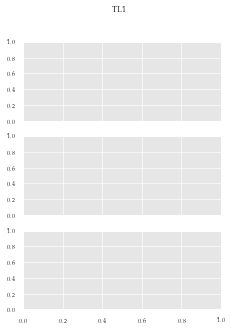

In [9]:

for i, atl in enumerate(atls):
    i, (ax2,ax3,ax4) = plt.subplots(3,1, figsize =(9*cm,12.5*cm), sharex=True) 
    i.suptitle(atl)
    # Loop over some different simulation results stored in different trj files
    for name in names:
        ext = pyramses.extractor(directory+name+".trj")
        data = pd.DataFrame(data = ext.getSync('G').S.time, columns=["time"])
    #     data["pt"] = ext.getBranch('TxMAIN').PF.value*1000
        data["wm"] = ext.getInj(atl).wm.value
        data["patl"] = ext.getInj(atl).P.value*1000
        data["f"] = ext.getInj(atl).f.value
    #     ax1 = sns.lineplot(ax=ax1, y="pt", x="time", data=data,linewidth=0.5)
        ax2 = sns.lineplot(ax=ax2, y="wm", x="time", data=data,linewidth=0.5, label=name)
        ax3 = sns.lineplot(ax=ax3, y="patl", x="time", data=data,linewidth=0.5, label=name)
        ax4 = sns.lineplot(ax=ax4, y="f", x="time", data=data,linewidth=0.5, label=name)

       
        # Legend
    ax2.legend()
    # Plot results for ATL Share
    # Axis labels
    # ax1.set_ylabel(r'$P_t$ in kW')
    ax2.set_ylabel(r'$\omega_m$ in p.u.')
    ax3.set_ylabel(r'$P_{atl}$ in kW')
    ax4.set_ylabel(r'$f$ in Hz')
    ax4.set_xlabel(r"time in s")


    # Axis limits
    # ax1.set_xlim([-0.25,5.25])
    ax2.set_xlim([-0.25,4.25])
    ax3.set_xlim([-0.25,4.25])
    ax4.set_xlim([-0.25,4.25])

    plt.savefig('.\\' + str(today) + '\\' + atl + '.pdf')
   
    
 